In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import boxcox

In [2]:
close = pd.read_csv(r'/Users/jitendrashirsat/Documents/Time-Series/TimeSeries/Last_Five_years_Lotto.csv'\
                ,index_col='RDate',parse_dates=True)

In [3]:
close.head(5)

,Key_id,First_P,Second_P,Third_P,Fourth_P,Fifth_P,Sixth_P,Result,Total,Product
RDate,,,,,,,,,,
2016-01-02,8302779,10,19,23,28,31,32,Roll,143,121381120
2016-01-06,2383816,2,15,25,43,45,46,Roll,176,66757500
2016-01-09,2173466,2,11,14,28,29,34,Roll,118,8503264
2016-01-13,8169338,10,14,26,37,42,47,Roll,176,265858320
2016-01-16,9502701,14,18,25,27,33,44,Roll,161,246985200


In [4]:
goog = close[['Total']].copy()

In [5]:
goog.head(5)

,Total
RDate,
2016-01-02,143
2016-01-06,176
2016-01-09,118
2016-01-13,176
2016-01-16,161


<AxesSubplot:xlabel='RDate'>

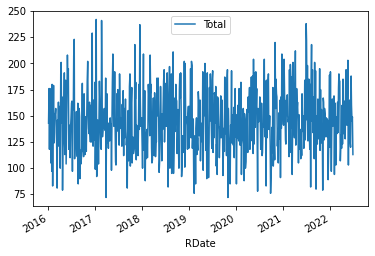

In [6]:
goog.plot()

In [7]:
goog_ret = np.log(goog.pct_change(1)+1)

In [8]:
goog_ret.head(4)

,Total
RDate,
2016-01-02,NaN
2016-01-06,0.207639
2016-01-09,-0.399799
2016-01-13,0.399799


<AxesSubplot:xlabel='RDate'>

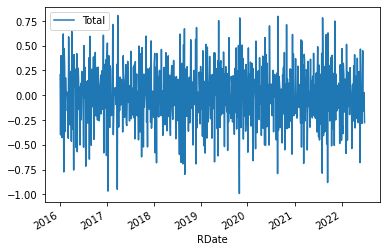

In [9]:
goog_ret.plot()

In [10]:
goog['TotalSMA-10'] = goog['Total'].rolling(10).mean()
goog.head(20)

,Total,TotalSMA-10
RDate,,
2016-01-02,143,NaN
2016-01-06,176,NaN
2016-01-09,118,NaN
2016-01-13,176,NaN
2016-01-16,161,NaN
2016-01-20,105,NaN
2016-01-23,142,NaN
2016-01-27,97,NaN
2016-01-30,180,NaN


<AxesSubplot:xlabel='RDate'>

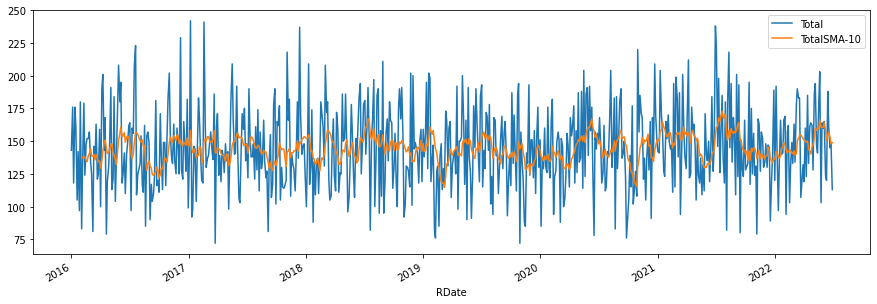

In [11]:
goog.plot(figsize=(15,5))

In [12]:
goog_ret['TotalSMA-10'] = goog_ret['Total'].rolling(10).mean()
goog_ret.head(20)

,Total,TotalSMA-10
RDate,,
2016-01-02,NaN,NaN
2016-01-06,0.207639,NaN
2016-01-09,-0.399799,NaN
2016-01-13,0.399799,NaN
2016-01-16,-0.089080,NaN
2016-01-20,-0.427444,NaN
2016-01-23,0.301867,NaN
2016-01-27,-0.381116,NaN
2016-01-30,0.618246,NaN


<AxesSubplot:xlabel='RDate'>

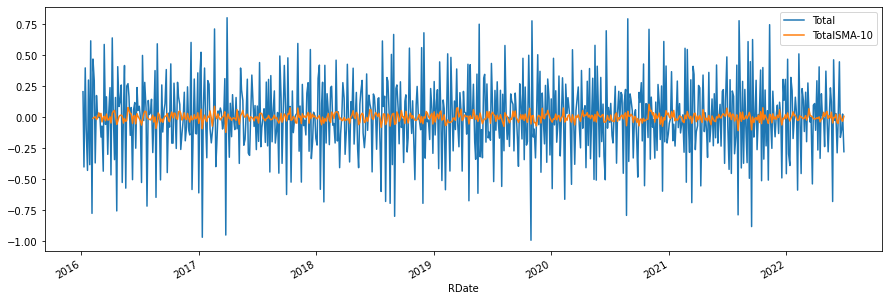

In [13]:
goog_ret.plot(figsize=(15,5))

# SMA for Product using boxCox

In [14]:
product = close[['Product']].copy()

In [15]:
product.head(5)

,Product
RDate,
2016-01-02,121381120
2016-01-06,66757500
2016-01-09,8503264
2016-01-13,265858320
2016-01-16,246985200


<AxesSubplot:xlabel='RDate'>

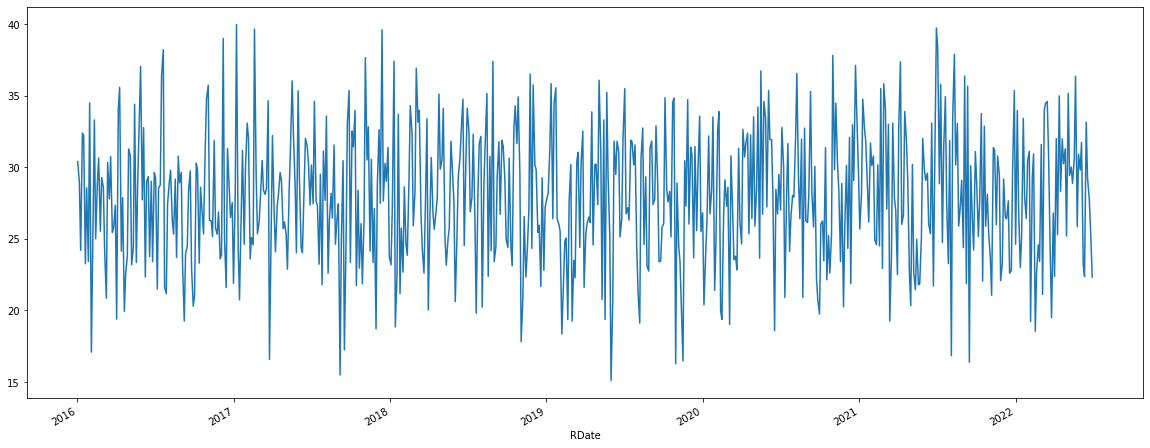

In [18]:
data , lam = boxcox(product['Product'])
product['BoxCoxProduct'] = data
product['BoxCoxProduct'].plot(figsize=(20,8))

<AxesSubplot:xlabel='RDate'>

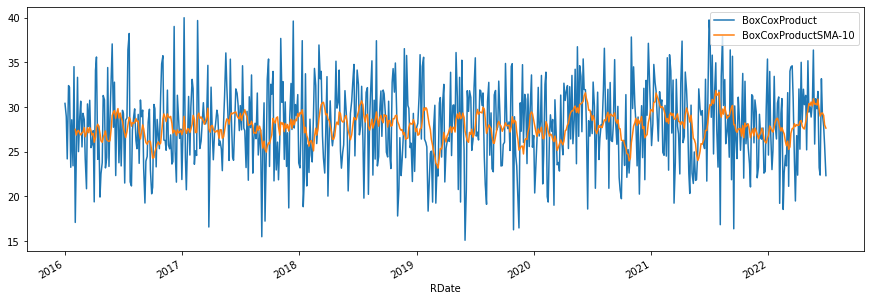

In [21]:
product['BoxCoxProductSMA-10'] = product['BoxCoxProduct'].rolling(10).mean()
product[['BoxCoxProduct','BoxCoxProductSMA-10']].plot(figsize=(15,5))